## Exploration
- Attribute analysis:
    - Name
    - Type
    - Missing values
    - Noisiness
    - Usefulness
    - Distribution type

- Data visualization

- Correlations

- Potential transformations

In [1]:
import sys
sys.path.append("..")

In [2]:
import seaborn as sns
from src.load import load_diamonds
from src.splitters import split_train_test

In [3]:
# Load train set
diamonds = load_diamonds()
diamonds_train, _ = split_train_test(diamonds)

In [4]:
# Correlation of each attribute with the price
corr_matrix = diamonds_train.corr()
corr_matrix["price"].sort_values(ascending=False)[1:]

carat    0.921706
x        0.885910
y        0.860702
z        0.854528
table    0.128272
depth   -0.008286
Name: price, dtype: float64

In [ ]:
# Pairplot
#sns.pairplot(diamonds_train, height=1.5)

<img src="../images/pairplot.png" width="500">

&lt;AxesSubplot:xlabel=&#39;carat&#39;, ylabel=&#39;price&#39;&gt;

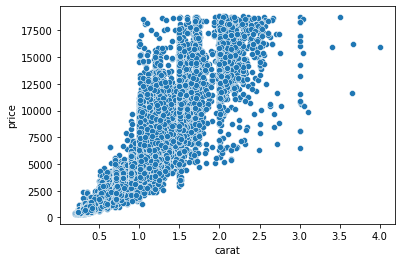

In [6]:
# Carat vs Price
sns.scatterplot(data=diamonds_train, x="carat", y="price")

In [7]:
# Try attribute combinations
diamonds_train["carat_squared"] = diamonds_train["carat"] ** 2
diamonds_train["mean_xy"] = (diamonds_train["x"] + diamonds_train["y"]) / 2
diamonds_train["ae_xy"] = (diamonds_train["x"] - diamonds_train["y"]).abs()
diamonds_train["se_xy"] = (diamonds_train["x"] - diamonds_train["y"]) ** 2

In [8]:
# Correlation again
corr_matrix = diamonds_train.corr()
corr_matrix["price"].sort_values(ascending=False)[1:]

carat            0.921706
carat_squared    0.895185
x                0.885910
mean_xy          0.880181
y                0.860702
z                0.854528
table            0.128272
ae_xy            0.037252
se_xy            0.011600
depth           -0.008286
Name: price, dtype: float64

### Insights
**carat**, **x**, **y** and **z** are strongly linearly correlated to **price**.

None of the newly created attributes seems promising.

It may be interesting to convert **depth** and **table** to categorical, following the next standard:

<img src="../images/table-depth.png" width="600" />